In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime

In [2]:
df = pd.read_csv('/content/1000 highest ranked universities in global rankings.csv')

데이터의 기초 통계량 확인

In [3]:
df

,Unnamed: 0,University,Country,THE 2022,QS 2023,ARWU 2021,USNWR 2022,Average,Ranking based on the average
0,0,Harvard University,United States,2,5,1,1.0,2.3,1.0
1,1,Massachusetts Institute of Technology (MIT),United States,5,1,4,2.0,3,2.0
2,2,Stanford University,United States,4,3,2,3.0,3,3.0
3,3,University of Oxford,United Kingdom,1,4,7,5.0,4.3,4.0
4,4,University of Cambridge,United Kingdom,5,2,3,8.0,4.5,5.0
...,...,...,...,...,...,...,...,...,...
1182,1182,University of Passau,Germany,351-400,NaN,NaN,NaN,NaN,NaN
1183,1183,North China Electric Power University,China,NaN,NaN,NaN,NaN,NaN,NaN
1184,1184,Institut National Polytechnique de Toulouse,France,NaN,NaN,NaN,NaN,NaN,NaN
1185,1185,Wuhan University of Science and Technology,China,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1187 non-null   int64  
 1   University                    1187 non-null   object 
 2   Country                       1187 non-null   object 
 3   THE 2022                      412 non-null    object 
 4   QS 2023                       1000 non-null   object 
 5   ARWU 2021                     585 non-null    object 
 6   USNWR 2022                    169 non-null    float64
 7   Average                       244 non-null    object 
 8   Ranking based on the average  258 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 83.6+ KB


데이터의 결측치 확인

In [4]:
# 결측치 개수 확인인
df.isnull().sum()

Unnamed: 0                         0
University                         0
Country                            0
THE 2022                         775
QS 2023                          187
ARWU 2021                        602
USNWR 2022                      1018
Average                          943
Ranking based on the average     929
dtype: int64

<Axes: >

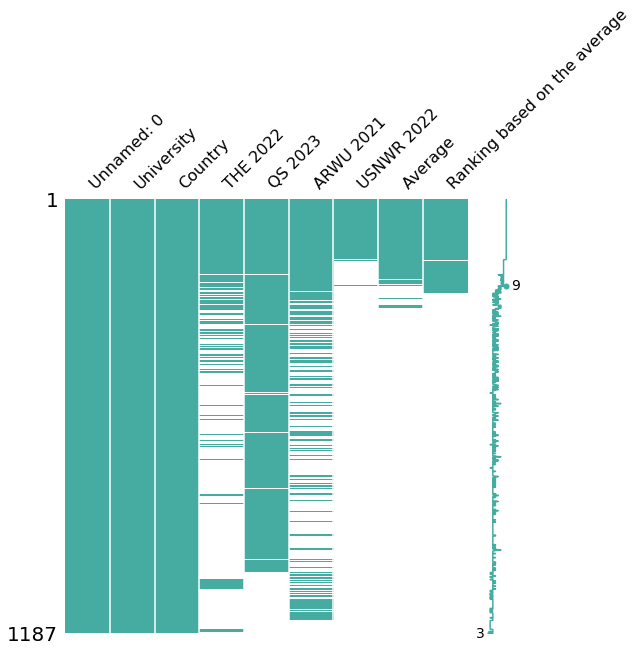

In [10]:
# msno를 사용해 결측치 위치 시각화
msno.matrix(df=df, figsize=(8, 8), color=(70/255, 172/255, 161/255))

In [12]:
df.dtypes

Unnamed: 0                        int64
University                       object
Country                          object
THE 2022                         object
QS 2023                          object
ARWU 2021                        object
USNWR 2022                      float64
Average                          object
Ranking based on the average    float64
dtype: object

대학 순위에서 나라별로 개수 확인

In [25]:
df["Country"].value_counts()

United States     213
China             107
United Kingdom     87
Germany            50
Italy              45
                 ... 
Ecuador             1
Oman                1
Tunisia             1
Cyprus              1
Ethiopia            1
Name: Country, Length: 87, dtype: int64

데이터를 간단히 보기 위해 상위100개만 간단히 FE도 해봄

In [29]:
# Top 100만 궁금해짐
df_100 = df.head(100)
df_100

,Unnamed: 0,University,Country,THE 2022,QS 2023,ARWU 2021,USNWR 2022,Average,Ranking based on the average
0,0,Harvard University,United States,2,5,1,1.0,2.3,1.0
1,1,Massachusetts Institute of Technology (MIT),United States,5,1,4,2.0,3,2.0
2,2,Stanford University,United States,4,3,2,3.0,3,3.0
3,3,University of Oxford,United Kingdom,1,4,7,5.0,4.3,4.0
4,4,University of Cambridge,United Kingdom,5,2,3,8.0,4.5,5.0
...,...,...,...,...,...,...,...,...,...
95,95,Purdue University,United States,105,129,86,127.0,111.8,97.0
96,96,University of Southampton,United Kingdom,124,78,151,97.0,112.5,98.0
97,97,Uppsala University,Sweden,131,128,78,113.0,112.5,99.0
98,98,Vanderbilt University,United States,113,199,65,73.0,112.5,100.0


In [31]:
# Top100의 나라별
df_100["Country"].value_counts()

United States     38
United Kingdom    13
Australia          8
China              6
Netherlands        6
Switzerland        4
Canada             4
France             3
Hong Kong          3
Germany            3
Japan              2
Denmark            2
Belgium            2
Singapore          2
South Korea        1
Norway             1
Finland            1
Sweden             1
Name: Country, dtype: int64

In [32]:
# 아쉽게도 연세대학교가 아니다.
df_100[df_100["Country"] == "South Korea"]

,Unnamed: 0,University,Country,THE 2022,QS 2023,ARWU 2021,USNWR 2022,Average,Ranking based on the average
65,65,Seoul National University,South Korea,54,29,101,130.0,78.5,66.0


In [33]:
# 우리가 흔히 잘 아는 미국 대학들 확인
df_100[df_100["Country"] == "United States"]

,Unnamed: 0,University,Country,THE 2022,QS 2023,ARWU 2021,USNWR 2022,Average,Ranking based on the average
0,0,Harvard University,United States,2,5,1,1.0,2.3,1.0
1,1,Massachusetts Institute of Technology (MIT),United States,5,1,4,2.0,3,2.0
2,2,Stanford University,United States,4,3,2,3.0,3,3.0
5,5,California Institute of Technology (Caltech),United States,2,6,9,9.0,6.5,6.0
6,6,"University of California, Berkeley (UCB)",United States,8,27,5,4.0,11,7.0
7,7,University of Chicago,United States,10,10,10,15.0,11.3,8.0
8,8,Princeton University,United States,7,16,6,16.0,11.3,9.0
9,9,Columbia University,United States,11,22,8,6.0,11.8,10.0
10,10,Yale University,United States,9,18,11,12.0,12.5,11.0
11,11,University of Pennsylvania,United States,13,13,15,13.0,13.5,12.0


In [42]:
pd.set_option('display.max_columns', None) # 전체 열 보기
pd.set_option('display.max_rows', None) # 전체 행 보기

In [47]:
# USNWR에서 발표한 Top100

df_USNWR_2022 = df_100.sort_values(by='USNWR 2022', ascending = True, ignore_index = True)
df_USNWR_2022

,Unnamed: 0,University,Country,THE 2022,QS 2023,ARWU 2021,USNWR 2022,Average,Ranking based on the average
0,0,Harvard University,United States,2,5,1,1.0,2.3,1.0
1,1,Massachusetts Institute of Technology (MIT),United States,5,1,4,2.0,3,2.0
2,2,Stanford University,United States,4,3,2,3.0,3,3.0
3,6,"University of California, Berkeley (UCB)",United States,8,27,5,4.0,11,7.0
4,3,University of Oxford,United Kingdom,1,4,7,5.0,4.3,4.0
5,9,Columbia University,United States,11,22,8,6.0,11.8,10.0
6,28,University of Washington,United States,29,80,19,7.0,33.8,29.0
7,4,University of Cambridge,United Kingdom,5,2,3,8.0,4.5,5.0
8,5,California Institute of Technology (Caltech),United States,2,6,9,9.0,6.5,6.0
9,13,Johns Hopkins University,United States,13,24,16,9.0,15.5,14.0


In [48]:
# ARWU에서 발표한 순위

df_ARWU_2022 = df_100.sort_values(by='ARWU 2021', ascending = True, ignore_index = True)
df_ARWU_2022

# object여서 sort 오류. to_numeric함수를 통해 int값으로 변경해줘야함.
# The 2022, QS 2023도 마찬가지

,Unnamed: 0,University,Country,THE 2022,QS 2023,ARWU 2021,USNWR 2022,Average,Ranking based on the average
0,0,Harvard University,United States,2,5,1,1.0,2.3,1.0
1,7,University of Chicago,United States,10,10,10,15.0,11.3,8.0
2,69,"University of California, Davis",United States,67,102,100,67.0,84,70.0
3,57,Chinese University of Hong Kong (CUHK),Hong Kong,49,38,101,82.0,67.5,57.0
4,62,Georgia Institute of Technology,United States,45,88,101,58.0,73,63.0
5,65,Seoul National University,South Korea,54,29,101,130.0,78.5,66.0
6,71,Brown University,United States,64,63,101,119.0,86.8,72.0
7,73,Wageningen University & Research,Netherlands,53,124,101,80.0,89.5,74.0
8,80,Ohio State University,United States,85,140,101,52.0,94.5,81.0
9,82,University of Warwick,United Kingdom,78,64,101,144.0,96.8,83.0


간단한한 FE.
Object type여서 int로 바꾼뒤, 컬럼 간의 관계 확인

In [60]:
df_100['THE 2022'] = df_100['THE 2022'].apply(pd.to_numeric, errors = 'coerce')
df_100['QS 2023'] = df_100['QS 2023'].apply(pd.to_numeric, errors = 'coerce')
df_100['ARWU 2021'] = df_100['ARWU 2021'].apply(pd.to_numeric, errors = 'coerce')

<ipython-input-60-b08b6da52339>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['THE 2022'] = df_100['THE 2022'].apply(pd.to_numeric, errors = 'coerce')
<ipython-input-60-b08b6da52339>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['QS 2023'] = df_100['QS 2023'].apply(pd.to_numeric, errors = 'coerce')
<ipython-input-60-b08b6da52339>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [62]:
df_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    100 non-null    int64  
 1   University                    100 non-null    object 
 2   Country                       100 non-null    object 
 3   THE 2022                      100 non-null    int64  
 4   QS 2023                       100 non-null    int64  
 5   ARWU 2021                     100 non-null    int64  
 6   USNWR 2022                    100 non-null    float64
 7   Average                       100 non-null    object 
 8   Ranking based on the average  100 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 7.2+ KB


<Axes: >

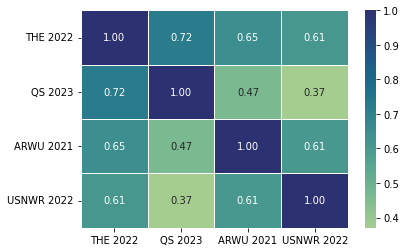

In [64]:
# 상관관계 확인

df_continuous = df_100[['THE 2022', 'QS 2023', 'ARWU 2021', 'USNWR 2022']]
sns.heatmap(df_continuous.corr(), annot = True, fmt = ".2f", linewidths = 1, cmap = 'crest')

# QS2022, THE 2022가 높은 편